In [1]:
!unzip TestDataSet.zip


Archive:  TestDataSet.zip
   creating: TestDataSet/
   creating: TestDataSet/n02795169/
  inflating: __MACOSX/TestDataSet/._n02795169  
   creating: TestDataSet/n02769748/
  inflating: __MACOSX/TestDataSet/._n02769748  
   creating: TestDataSet/n02834397/
  inflating: __MACOSX/TestDataSet/._n02834397  
   creating: TestDataSet/n02917067/
  inflating: __MACOSX/TestDataSet/._n02917067  
   creating: TestDataSet/n02808304/
  inflating: __MACOSX/TestDataSet/._n02808304  
   creating: TestDataSet/n03016953/
  inflating: __MACOSX/TestDataSet/._n03016953  
   creating: TestDataSet/n02793495/
  inflating: __MACOSX/TestDataSet/._n02793495  
   creating: TestDataSet/n02814533/
  inflating: __MACOSX/TestDataSet/._n02814533  
   creating: TestDataSet/n02837789/
  inflating: __MACOSX/TestDataSet/._n02837789  
   creating: TestDataSet/n02840245/
  inflating: __MACOSX/TestDataSet/._n02840245  
   creating: TestDataSet/n02992211/
  inflating: __MACOSX/TestDataSet/._n02992211  
   creating: TestDataSet

In [2]:
!ls TestDataSet


labels_list.json  n02782093  n02808304	n02865351  n02930766  n02988304
n02672831	  n02783161  n02808440	n02869837  n02939185  n02992211
n02676566	  n02786058  n02814533	n02870880  n02948072  n02992529
n02687172	  n02787622  n02814860	n02871525  n02950826  n02999410
n02690373	  n02788148  n02815834	n02877765  n02951358  n03000134
n02692877	  n02790996  n02817516	n02879718  n02951585  n03000247
n02699494	  n02791124  n02823428	n02883205  n02963159  n03000684
n02701002	  n02791270  n02823750	n02892201  n02965783  n03014705
n02704792	  n02793495  n02825657	n02892767  n02966193  n03016953
n02708093	  n02794156  n02834397	n02894605  n02966687  n03017168
n02727426	  n02795169  n02835271	n02895154  n02971356  n03018349
n02730930	  n02797295  n02837789	n02906734  n02974003  n03026506
n02747177	  n02799071  n02840245	n02909870  n02977058  n03028079
n02749479	  n02802426  n02841315	n02910353  n02978881  n03032252
n02769748	  n02804414  n02843684	n02916936  n02979186  n03041632
n02776631	  n028046

In [4]:
!rm -rf __MACOSX

# Task 1

In [5]:
import os
import json
import torch
import numpy as np
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Loading Pre-trained model

In [6]:
# pretrained_model = torchvision.models.resnet34(weights='IMAGENET1K_V1')
model = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
model = model.to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define the transforms

In [7]:
mean_norms = np.array([0.485, 0.456, 0.406])
std_norms  = np.array([0.229, 0.224, 0.225])
plain_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_norms, std=std_norms)
])
dataset = datasets.ImageFolder(root="./TestDataSet", transform=plain_transforms)
print(dataset.classes[:20])   # Print only the first 20 to have a look
print("Total", len(dataset.classes), "classes")

['n02672831', 'n02676566', 'n02687172', 'n02690373', 'n02692877', 'n02699494', 'n02701002', 'n02704792', 'n02708093', 'n02727426', 'n02730930', 'n02747177', 'n02749479', 'n02769748', 'n02776631', 'n02777292', 'n02782093', 'n02783161', 'n02786058', 'n02787622']
Total 100 classes


### Loading dataset

In [8]:
dataset_path = "./TestDataSet"
dataset = datasets.ImageFolder(root=dataset_path, transform=plain_transforms)

### Read the labels.json and establish the mapping

In [9]:
# Obtain 100 SynSets
synsets = dataset.classes

# Obtain 100 class names
with open(os.path.join(dataset_path, "labels_list.json"), "r") as f:
    label_list = json.load(f)

# Extract the class name section
json_classnames = [x.split(": ")[1] for x in label_list]

print("The first 5 synsets in the folder:", synsets[:5])
print("The first 5 classes names of labels_list.json:", json_classnames[:5])

# Print out the forms that need to compare manually
for i, (syn, name) in enumerate(zip(synsets, json_classnames)):
    print(f"{i:3}:  {syn:<12}  <--→  {name}")


The first 5 synsets in the folder: ['n02672831', 'n02676566', 'n02687172', 'n02690373', 'n02692877']
The first 5 classes names of labels_list.json: ['accordion', 'acoustic guitar', 'aircraft carrier', 'airliner', 'airship']
  0:  n02672831     <--→  accordion
  1:  n02676566     <--→  acoustic guitar
  2:  n02687172     <--→  aircraft carrier
  3:  n02690373     <--→  airliner
  4:  n02692877     <--→  airship
  5:  n02699494     <--→  altar
  6:  n02701002     <--→  ambulance
  7:  n02704792     <--→  amphibian
  8:  n02708093     <--→  analog clock
  9:  n02727426     <--→  apiary
 10:  n02730930     <--→  apron
 11:  n02747177     <--→  ashcan
 12:  n02749479     <--→  assault rifle
 13:  n02769748     <--→  backpack
 14:  n02776631     <--→  bakery
 15:  n02777292     <--→  balance beam
 16:  n02782093     <--→  balloon
 17:  n02783161     <--→  ballpoint
 18:  n02786058     <--→  Band Aid
 19:  n02787622     <--→  banjo
 20:  n02788148     <--→  bannister
 21:  n02790996     <--→ 

In [10]:
# read labels_list.json
json_path = os.path.join(dataset_path, "labels_list.json")
with open(json_path, "r") as f:
    label_list = json.load(f)

# Construct the name to index mapping
name_to_idx = {}
for item in label_list:
    parts = item.split(": ")
    idx = int(parts[0])
    name = parts[1].strip()
    name_to_idx[name] = idx

# Build the synset to index mapping
syn_to_name = {
    'n02672831': 'accordion',
    'n02676566': 'acoustic guitar',
    'n02687172': 'aircraft carrier',
    'n02690373': 'airliner',
    'n02692877': 'airship',
    'n02699494': 'altar',
    'n02701002': 'ambulance',
    'n02704792': 'amphibian',
    'n02708093': 'analog clock',
    'n02727426': 'apiary',
    'n02730930': 'apron',
    'n02747177': 'ashcan',
    'n02749479': 'assault rifle',
    'n02769748': 'backpack',
    'n02776631': 'bakery',
    'n02777292': 'balance beam',
    'n02782093': 'balloon',
    'n02783161': 'ballpoint',
    'n02786058': 'Band Aid',
    'n02787622': 'banjo',
    'n02788148': 'bannister',
    'n02790996': 'barbell',
    'n02791124': 'barber chair',
    'n02791270': 'barbershop',
    'n02793495': 'barn',
    'n02794156': 'barometer',
    'n02795169': 'barrel',
    'n02797295': 'barrow',
    'n02799071': 'baseball',
    'n02802426': 'basketball',
    'n02804414': 'bassinet',
    'n02804610': 'bassoon',
    'n02807133': 'bathing cap',
    'n02808304': 'bath towel',
    'n02808440': 'bathtub',
    'n02814533': 'beach wagon',
    'n02814860': 'beacon',
    'n02815834': 'beaker',
    'n02817516': 'bearskin',
    'n02823428': 'beer bottle',
    'n02823750': 'beer glass',
    'n02825657': 'bell cote',
    'n02834397': 'bib',
    'n02835271': 'bicycle-built-for-two',
    'n02837789': 'bikini',
    'n02840245': 'binder',
    'n02841315': 'binoculars',
    'n02843684': 'birdhouse',
    'n02859443': 'boathouse',
    'n02860847': 'bobsled',
    'n02865351': 'bolo tie',
    'n02869837': 'bonnet',
    'n02870880': 'bookcase',
    'n02871525': 'bookshop',
    'n02877765': 'bottlecap',
    'n02879718': 'bow',
    'n02883205': 'bow tie',
    'n02892201': 'brass',
    'n02892767': 'brassiere',
    'n02894605': 'breakwater',
    'n02895154': 'breastplate',
    'n02906734': 'broom',
    'n02909870': 'bucket',
    'n02910353': 'buckle',
    'n02916936': 'bulletproof vest',
    'n02917067': 'bullet train',
    'n02927161': 'butcher shop',
    'n02930766': 'cab',
    'n02939185': 'caldron',
    'n02948072': 'candle',
    'n02950826': 'cannon',
    'n02951358': 'canoe',
    'n02951585': 'can opener',
    'n02963159': 'cardigan',
    'n02965783': 'car mirror',
    'n02966193': 'carousel',
    'n02966687': "carpenter's kit",
    'n02971356': 'carton',
    'n02974003': 'car wheel',
    'n02977058': 'cash machine',
    'n02978881': 'cassette',
    'n02979186': 'cassette player',
    'n02980441': 'castle',
    'n02981792': 'catamaran',
    'n02988304': 'CD player',
    'n02992211': 'cello',
    'n02992529': 'cellular telephone',
    'n02999410': 'chain',
    'n03000134': 'chainlink fence',
    'n03000247': 'chain mail',
    'n03000684': 'chain saw',
    'n03014705': 'chest',
    'n03016953': 'chiffonier',
    'n03017168': 'chime',
    'n03018349': 'china cabinet',
    'n03026506': 'Christmas stocking',
    'n03028079': 'church',
    'n03032252': 'cinema',
    'n03041632': 'cleaver',
    'n03042490': 'cliff dwelling'
}

# Construct synset to global index
label_map = {syn: name_to_idx[name] for syn, name in syn_to_name.items()}

# Construct numeric_labels
numeric_labels = [label_map[syn] for syn in dataset.classes]
print("numeric_labels has been constructed, the first five：", numeric_labels[:5])


numeric_labels has been constructed, the first five： [401, 402, 403, 404, 405]


In [12]:
def compute_topk_accuracy(outputs, targets, topk=(1,5)):
    maxk = max(topk)
    batch_size = targets.size(0)

    _, pred = outputs.topk(maxk, dim=1, largest=True, sorted=True)  # [B, maxk]
    pred = pred.t()  # [maxk, B]
    correct = pred.eq(targets.view(1, -1).expand_as(pred))

    res = {}
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res[k] = correct_k.item() * 100.0 / batch_size
    return res


In [13]:
from torch.utils.data import DataLoader
import torch

# Evaluate the set loader
loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)

# Prepare to evaluate
total1, total5, batches = 0.0, 0.0, 0
model.eval()

with torch.no_grad():
    for imgs, folder_idxs in loader:
        imgs = imgs.to(device)
        outputs = model(imgs)  # [B, 1000]

        # Construct the real labels using numeric_labels
        true_idxs = [numeric_labels[i] for i in folder_idxs.tolist()]
        targets = torch.tensor(true_idxs, dtype=torch.long, device=device)

        acc = compute_topk_accuracy(outputs, targets, topk=(1, 5))
        total1 += acc[1]
        total5 += acc[5]
        batches += 1

# Print
print(f"Baseline Top-1 Accuracy: {total1/batches:.2f}%")
print(f"Baseline Top-5 Accuracy: {total5/batches:.2f}%")


Baseline Top-1 Accuracy: 75.39%
Baseline Top-5 Accuracy: 93.87%


# Task 2

100%|██████████| 500/500 [00:18<00:00, 26.61it/s]
<ipython-input-14-5ede2d5b16a9>:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbls = torch.tensor(lbls, device=device)


Maximum L∞ distance over all adversarial samples: 0.02000
FGSM Top-1 Accuracy: 3.00%
FGSM Top-5 Accuracy: 19.00%


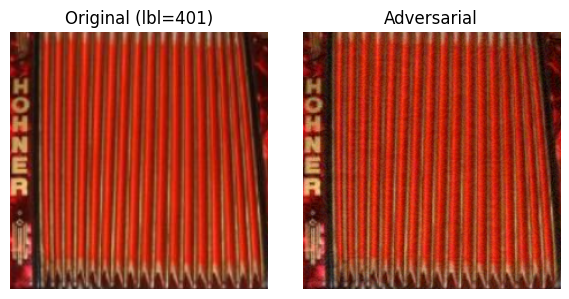

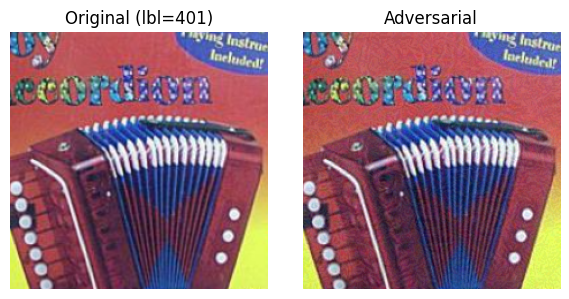

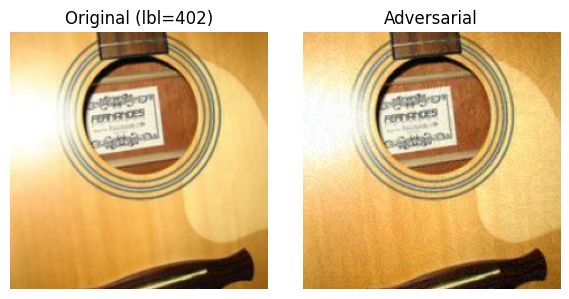

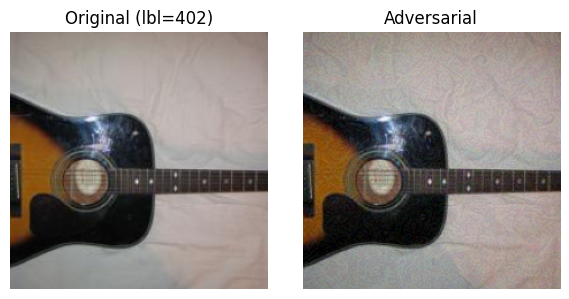

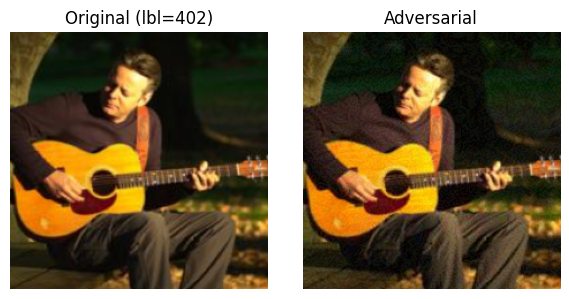

In [14]:
import os
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from tqdm import tqdm
from PIL import Image

# 1.
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epsilon   = 0.02
dataset_pa = "./TestDataSet"
adv_dir   = "./adv_test_fgsm"
os.makedirs(adv_dir, exist_ok=True)

# 2. 加载 Task1 构造好的 numeric_labels


# 3. 预处理 & 标准化
# 生成对抗样本时：只读图 + ToTensor
prep = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
# 评估对抗样本时：ToTensor + Normalize
normalized_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
# mean/std 张量，用于 fgsm 内部标准化
mean = torch.tensor([0.485,0.456,0.406], device=device).view(1,3,1,1)
std  = torch.tensor([0.229,0.224,0.225], device=device).view(1,3,1,1)

# 4. 加载模型
model = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
model = model.to(device).eval()

# 5. FGSM 攻击函数
def fgsm_attack(model, image, label_idx, ε, mean, std):
    """
    image: [1,3,224,224] tensor ∈ [0,1]
    label_idx: Python int in [0..999]
    """
    x = image.clone().detach().to(device)
    x.requires_grad_()
    # 标准化后送入模型
    normed = (x - mean) / std
    out = model(normed)
    target = torch.tensor([label_idx], device=device)
    loss = F.cross_entropy(out, target)
    loss.backward()
    # 单步 sign 更新
    pert = ε * x.grad.data.sign()
    adv = torch.clamp(x + pert, 0.0, 1.0)
    return adv.detach()



# 6. 生成对抗样本 & 验证 L∞ & 可视化
# 复用 raw_dataset 来读取原始图像
raw_ds = datasets.ImageFolder(dataset_pa, transform=prep)
loader = DataLoader(raw_ds, batch_size=1, shuffle=False)

max_linf = 0.0
mis_examples = []
for idx, (img, folder_idx) in enumerate(tqdm(loader)):
    img = img.to(device)
    # 从 folder_idx (0..99) 映射到全局 ImageNet idx (0..999)
    true_idx = numeric_labels[folder_idx.item()]

    # 生成 adversarial
    adv = fgsm_attack(model, img, true_idx, epsilon, mean, std)
    # 2. 计算并跟踪 L∞
    linf = (adv - img).abs().max().item()
    max_linf = max(max_linf, linf)
    assert linf <= epsilon + 1e-6, f"L∞={linf:.5f} > ε"


    # 保存对抗图
    save_path = os.path.join(adv_dir, f"{idx:04d}.png")
    save_image(adv.cpu(), save_path)

    # 收集前 5 个“原本正确 → 后误判”的示例
    if len(mis_examples) < 5:
        with torch.no_grad():
            pred_o = model((img - mean) / std).argmax(1).item()
            pred_a = model((adv - mean) / std).argmax(1).item()
        if pred_o == true_idx and pred_a != true_idx:
            mis_examples.append((img.cpu(), adv.cpu(), true_idx))

# 循环结束后，打印最大 L∞
print(f"Maximum L∞ distance over all adversarial samples: {max_linf:.5f}")

# 7. 评估 FGSM 对抗集 Top-1 / Top-5
class AdvDataset(Dataset):
    def __init__(self, image_dir, labels, transform):
        self.paths = sorted(os.listdir(image_dir))
        self.dir   = image_dir
        self.labels= labels
        self.trans = transform
    def __len__(self): return len(self.labels)
    def __getitem__(self, i):
        path = os.path.join(self.dir, self.paths[i])
        img  = Image.open(path).convert("RGB")     # PIL Image
        img_t = self.trans(img)                    # ToTensor()+Normalize()
        return img_t, self.labels[i]

# 构造 expanded_labels：500 张图，每类 5 张
expanded_labels = []
for i in range(100):
    expanded_labels += [numeric_labels[i]] * 5

adv_ds  = AdvDataset(adv_dir, expanded_labels, normalized_transform)
adv_lo  = DataLoader(adv_ds, batch_size=32, shuffle=False)

total1 = total5 = 0
total   = 0
with torch.no_grad():
    for imgs, lbls in adv_lo:
        imgs = imgs.to(device)
        lbls = torch.tensor(lbls, device=device)
        out  = model(imgs)
        _, pred5 = out.topk(5, dim=1)
        total += lbls.size(0)
        total1 += (pred5[:,0] == lbls).sum().item()
        for p,true in zip(pred5, lbls):
            if true.item() in p.tolist():
                total5 += 1

print(f"FGSM Top-1 Accuracy: {100*total1/total:.2f}%")
print(f"FGSM Top-5 Accuracy: {100*total5/total:.2f}%")

# 可视化示例
for img_o, img_a, lbl in mis_examples:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(to_pil_image(img_o.squeeze()))
    plt.title(f"Original (lbl={lbl})"); plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(to_pil_image(img_a.squeeze()))
    plt.title("Adversarial"); plt.axis("off")
    plt.tight_layout(); plt.show()


# Task 3

100%|██████████| 500/500 [01:18<00:00,  6.34it/s]
<ipython-input-15-30a5938604f9>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbls = torch.tensor(lbls, device=device)


[PGD] Maximum L∞ distance: 0.02000
[PGD] Top-1 Accuracy: 0.00%
[PGD] Top-5 Accuracy: 0.80%


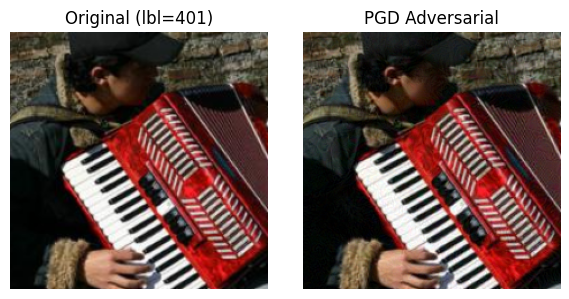

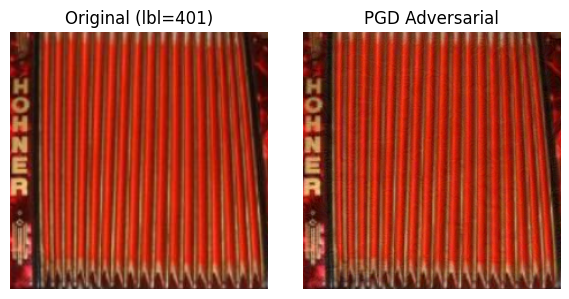

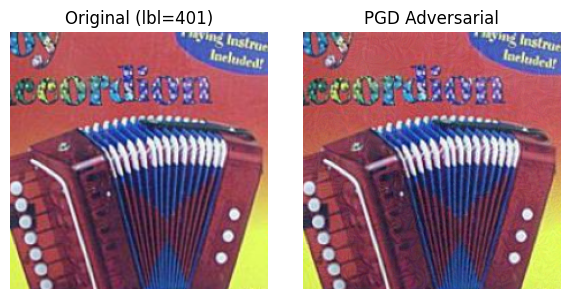

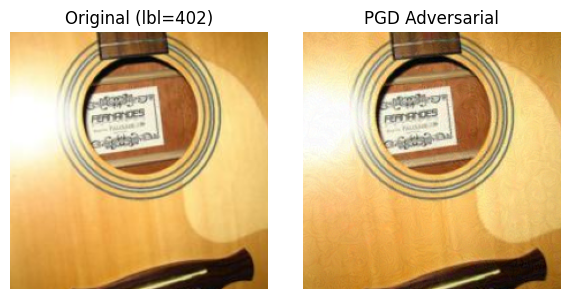

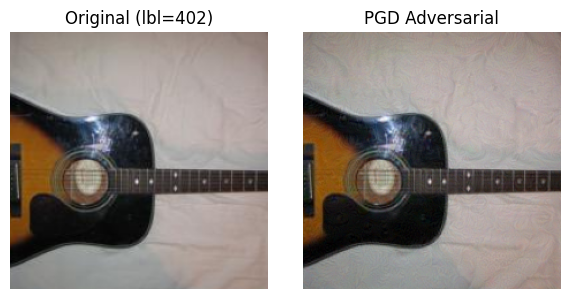

In [15]:
# ─── Task 3: PGD 攻击 ─────────────────────────────────────────────

import torch.nn as nn

# PGD 攻击函数
def pgd_attack(model, image, label_idx, epsilon, alpha, iters, mean, std):
    x = image.clone().detach().to(device)
    x_orig = x.clone().detach()
    x.requires_grad = True

    for _ in range(iters):
        normed = (x - mean) / std
        output = model(normed)
        loss = F.cross_entropy(output, torch.tensor([label_idx], device=device))
        loss.backward()
        grad = x.grad.data

        # 更新
        x = x + alpha * grad.sign()
        x = torch.max(torch.min(x, x_orig + epsilon), x_orig - epsilon)  # 投影
        x = torch.clamp(x, 0, 1).detach()
        x.requires_grad = True

    return x.detach()

# 创建 PGD 对抗集路径
pgd_dir = "./adv_test_pgd"
os.makedirs(pgd_dir, exist_ok=True)

# 生成 PGD 对抗样本
alpha = 0.005
iters = 10

raw_ds.transform = prep  # 重用 Task 2 中的 prep
loader = DataLoader(raw_ds, batch_size=1, shuffle=False)

mis_examples_pgd = []
max_linf_pgd = 0.0

for idx, (img, folder_idx) in enumerate(tqdm(loader)):
    img = img.to(device)
    true_idx = numeric_labels[folder_idx.item()]

    adv = pgd_attack(model, img, true_idx, epsilon, alpha, iters, mean, std)

    linf = (adv - img).abs().max().item()
    max_linf_pgd = max(max_linf_pgd, linf)
    assert linf <= epsilon + 1e-6, f"PGD L∞={linf:.5f} > ε"

    save_path = os.path.join(pgd_dir, f"{idx:04d}.png")
    save_image(adv.cpu(), save_path)

    # 收集前 5 个“原本正确 → 后误判”的示例
    if len(mis_examples_pgd) < 5:
        with torch.no_grad():
            pred_o = model((img - mean) / std).argmax(1).item()
            pred_a = model((adv - mean) / std).argmax(1).item()
        if pred_o == true_idx and pred_a != true_idx:
            mis_examples_pgd.append((img.cpu(), adv.cpu(), true_idx))

print(f"[PGD] Maximum L∞ distance: {max_linf_pgd:.5f}")

# 评估 PGD 对抗集
adv_ds_pgd = AdvDataset(pgd_dir, expanded_labels, normalized_transform)
adv_lo_pgd = DataLoader(adv_ds_pgd, batch_size=32, shuffle=False)

correct1 = correct5 = total = 0
with torch.no_grad():
    for imgs, lbls in adv_lo_pgd:
        imgs = imgs.to(device)
        lbls = torch.tensor(lbls, device=device)
        out = model(imgs)
        _, pred5 = out.topk(5, dim=1)
        correct1 += (pred5[:, 0] == lbls).sum().item()
        for p, true in zip(pred5, lbls):
            if true.item() in p.tolist():
                correct5 += 1
        total += lbls.size(0)

print(f"[PGD] Top-1 Accuracy: {100*correct1/total:.2f}%")
print(f"[PGD] Top-5 Accuracy: {100*correct5/total:.2f}%")

# 可视化示例
for img_o, img_a, lbl in mis_examples_pgd:
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(to_pil_image(img_o.squeeze()))
    plt.title(f"Original (lbl={lbl})"); plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(to_pil_image(img_a.squeeze()))
    plt.title("PGD Adversarial"); plt.axis("off")
    plt.tight_layout(); plt.show()


# Task 4

100%|██████████| 500/500 [01:18<00:00,  6.34it/s]
<ipython-input-16-2730123a44ee>:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbls = torch.tensor(lbls, device=device)


[Patch] Max L∞: 0.10000
[Patch] Top-1 Accuracy: 43.80%
[Patch] Top-5 Accuracy: 76.60%


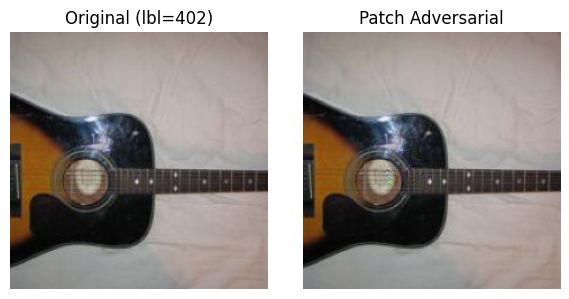

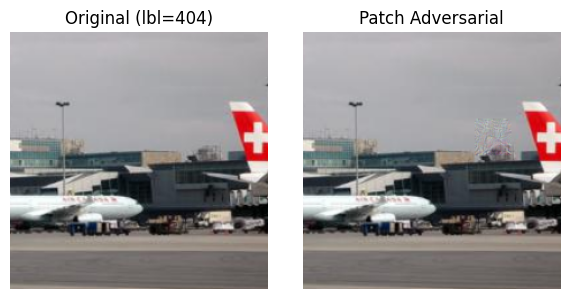

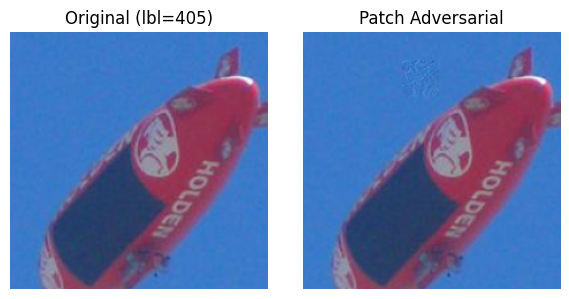

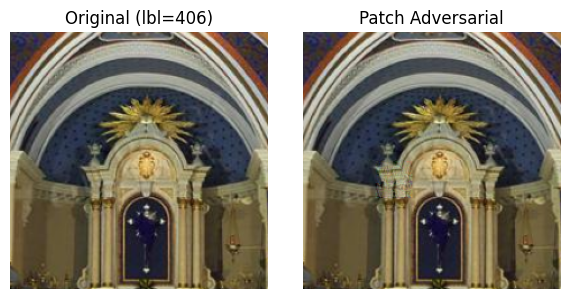

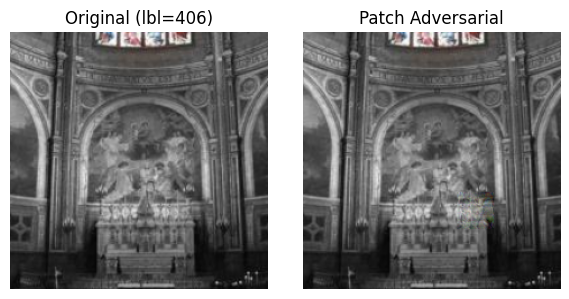

In [16]:
import os, torch
import torch.nn.functional as F
from torchvision import transforms, datasets, models
from torchvision.utils import save_image
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
import random

# 设置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epsilon = 0.3
alpha = 0.01
iters = 10
patch_size = 32
dataset_pa = "./TestDataSet"
patch_dir = "./adv_test_patch"
os.makedirs(patch_dir, exist_ok=True)

# 预处理
prep = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
normalized_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std= [0.229, 0.224, 0.225])
])
mean = torch.tensor([0.485, 0.456, 0.406], device=device).view(1,3,1,1)
std  = torch.tensor([0.229, 0.224, 0.225], device=device).view(1,3,1,1)

# 模型 和 numeric_labels（复用 Task1）

# PGD Patch攻击函数
def pgd_patch_attack(model, image, label_idx, epsilon, alpha, iters, mean, std, patch_size):
    x = image.clone().detach().to(device)
    x_orig = x.clone().detach()
    _, _, H, W = x.shape
    top = random.randint(0, H - patch_size)
    left = random.randint(0, W - patch_size)
    mask = torch.zeros_like(x)
    mask[:, :, top:top+patch_size, left:left+patch_size] = 1.0

    x.requires_grad = True
    for _ in range(iters):
        normed = (x - mean) / std
        output = model(normed)
        loss = F.cross_entropy(output, torch.tensor([label_idx], device=device))
        loss.backward()
        grad = x.grad.data
        x = x + alpha * grad.sign() * mask
        x = torch.max(torch.min(x, x_orig + epsilon * mask), x_orig - epsilon * mask)
        x = torch.clamp(x, 0, 1).detach()
        x.requires_grad = True
    return x.detach()

# 加载图像
raw_ds = datasets.ImageFolder(dataset_pa, transform=prep)
loader = DataLoader(raw_ds, batch_size=1, shuffle=False)

mis_examples_patch = []
max_linf_patch = 0.0

for idx, (img, folder_idx) in enumerate(tqdm(loader)):
    img = img.to(device)
    true_idx = numeric_labels[folder_idx.item()]
    adv = pgd_patch_attack(model, img, true_idx, epsilon, alpha, iters, mean, std, patch_size)
    linf = (adv - img).abs().max().item()
    max_linf_patch = max(max_linf_patch, linf)
    save_path = os.path.join(patch_dir, f"{idx:04d}.png")
    save_image(adv.cpu(), save_path)
    if len(mis_examples_patch) < 5:
        with torch.no_grad():
            pred_o = model((img - mean) / std).argmax(1).item()
            pred_a = model((adv - mean) / std).argmax(1).item()
        if pred_o == true_idx and pred_a != true_idx:
            mis_examples_patch.append((img.cpu(), adv.cpu(), true_idx))

print(f"[Patch] Max L∞: {max_linf_patch:.5f}")

# 评估
class AdvDataset(Dataset):
    def __init__(self, image_dir, labels, transform):
        self.paths = sorted(os.listdir(image_dir))
        self.dir = image_dir
        self.labels = labels
        self.trans = transform
    def __len__(self): return len(self.labels)
    def __getitem__(self, i):
        path = os.path.join(self.dir, self.paths[i])
        img = Image.open(path).convert("RGB")
        img_t = self.trans(img)
        return img_t, self.labels[i]

expanded_labels = []
for i in range(100): expanded_labels += [numeric_labels[i]] * 5
adv_ds_patch = AdvDataset(patch_dir, expanded_labels, normalized_transform)
adv_lo_patch = DataLoader(adv_ds_patch, batch_size=32, shuffle=False)

correct1 = correct5 = total = 0
with torch.no_grad():
    for imgs, lbls in adv_lo_patch:
        imgs = imgs.to(device)
        lbls = torch.tensor(lbls, device=device)
        out = model(imgs)
        _, pred5 = out.topk(5, dim=1)
        correct1 += (pred5[:, 0] == lbls).sum().item()
        for p, true in zip(pred5, lbls):
            if true.item() in p.tolist():
                correct5 += 1
        total += lbls.size(0)

print(f"[Patch] Top-1 Accuracy: {100*correct1/total:.2f}%")
print(f"[Patch] Top-5 Accuracy: {100*correct5/total:.2f}%")

# 可视化
for img_o, img_a, lbl in mis_examples_patch:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(to_pil_image(img_o.squeeze()))
    plt.title(f"Original (lbl={lbl})"); plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(to_pil_image(img_a.squeeze()))
    plt.title("Patch Adversarial"); plt.axis("off")
    plt.tight_layout(); plt.show()


# Task 5

In [19]:
import os
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from tqdm import tqdm

# 设置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载 DenseNet121 模型
new_model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).to(device).eval()

# 标准化
normalize_only = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std =[0.229, 0.224, 0.225])

# 读取图像
prep = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# 装置 labels
expanded_labels = []
for i in range(100):
    expanded_labels += [numeric_labels[i]] * 5

# 加载对拟集
datasets_paths = {
    "Original": "./TestDataSet",
    "FGSM": "./adv_test_fgsm",
    "PGD": "./adv_test_pgd",
    "Patch": "./adv_test_patch"
}

class AdvDataset(Dataset):
    def __init__(self, image_dir, labels, transform):
        self.paths = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.dir = image_dir
        self.labels = labels
        self.trans = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, i):
        path = os.path.join(self.dir, self.paths[i])
        img = Image.open(path).convert("RGB")
        return self.trans(img), self.labels[i]

def evaluate_dataset(path, labels, model, name):
    if name == "Original":
        # 对于 Original 集，需要先 ToTensor，再 Normalize
        ds = datasets.ImageFolder(path, transform=prep)
        loader = DataLoader(ds, batch_size=32, shuffle=False)
        correct1 = correct5 = total = 0
        with torch.no_grad():
            for imgs, folder_idxs in loader:
                imgs = imgs.to(device)
                lbls = torch.tensor([numeric_labels[i] for i in folder_idxs.tolist()], device=device)
                imgs = normalize_only(imgs)
                out = model(imgs)
                _, pred5 = out.topk(5, dim=1)
                total += lbls.size(0)
                correct1 += (pred5[:, 0] == lbls).sum().item()
                for p, true in zip(pred5, lbls):
                    if true.item() in p.tolist():
                        correct5 += 1
    else:
        ds = AdvDataset(path, labels, transform=transforms.Compose([
            transforms.ToTensor(),
            normalize_only
        ]))
        loader = DataLoader(ds, batch_size=32, shuffle=False)
        correct1 = correct5 = total = 0
        with torch.no_grad():
            for imgs, lbls in loader:
                imgs = imgs.to(device)
                lbls = torch.tensor(lbls, device=device)
                out = model(imgs)
                _, pred5 = out.topk(5, dim=1)
                total += lbls.size(0)
                correct1 += (pred5[:, 0] == lbls).sum().item()
                for p, true in zip(pred5, lbls):
                    if true.item() in p.tolist():
                        correct5 += 1
    print(f"[{name}] Top-1 Accuracy: {100*correct1/total:.2f}%")
    print(f"[{name}] Top-5 Accuracy: {100*correct5/total:.2f}%")

# 进行评估
for name, path in datasets_paths.items():
    evaluate_dataset(path, expanded_labels, new_model, name)


[Original] Top-1 Accuracy: 70.80%
[Original] Top-5 Accuracy: 91.20%


<ipython-input-19-9a17be8a3132>:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbls = torch.tensor(lbls, device=device)


[FGSM] Top-1 Accuracy: 40.00%
[FGSM] Top-5 Accuracy: 69.60%
[PGD] Top-1 Accuracy: 32.20%
[PGD] Top-5 Accuracy: 68.20%
[Patch] Top-1 Accuracy: 68.00%
[Patch] Top-5 Accuracy: 90.40%
